In [4]:
#WIZUALIZACJA WYNIKÓW SCRAPERA
#wyniki dla TOP20 filmów z rankingu filmweba

In [356]:
#biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [357]:
#przygotowanie danych z plików csv
path = 'C:/Users/admin/Desktop/filmweb_project'
files = os.listdir(path)
sep = '/'

file_paths = [path + sep + file for file in files]
file_names = [file[:-4] for file in files] #getting rid of '.csv' part
print('Name of files: ' + str(file_names))

data_dict = {}
names = ['Name', 'Number_of_movies']

i = 0
for name in file_names:
    #wczytaj csv
    df = pd.read_csv(file_paths[i],names=names)
    #odrzuć wiersze nie mające wartości 
    df = df.dropna()
    #dodaj serie danych do słownika i uszereguj je malejąco pod wzgledem liczby filmów
    data_dict[name] = df.sort_values(by='Number_of_movies', ascending=False)   
    i += 1
    
for name in file_names:
    print('Number of {}: {}'.format(name,str(len(data_dict[name]))))

Name of files: ['actors', 'directors', 'music', 'screenwriters']
Number of actors: 1598
Number of directors: 17
Number of music: 18
Number of screenwriters: 26


In [391]:
#przykład wczytanych danych
print(data_dict['actors'].head(10))

                 Name  Number_of_movies
666  John Rhys-Davies                 4
665       Andy Serkis                 4
189      Frank Sivero                 3
392       Brad Dourif                 3
425    Robert De Niro                 3
178        Abe Vigoda                 2
186     Sofia Coppola                 2
184      Gianni Russo                 2
183         Rudy Bond                 2
687     Bruce Hopkins                 2


In [359]:
#obiekt odpowiadający za nadzworowanie numerów figur (optional)
class Figure:
    
    def __init__(self):
        self.number = 1
    
    def generate_number(self):
        output = self.number
        self.number += 1
        return output
    
figure = Figure()

In [360]:
#obiekt do tworzenia bar plot
class BarPlot:
    edge_color = (0,0,0)
    line_width = 2
    
    def __init__(self, x, y, xtitle, ytitle, title):
        self.x = x
        self.y = y
        self.xtitle = xtitle
        self.ytitle = ytitle
        self.title = title
    
    def define(self):
        min_val = min(self.x)
        max_val = max(self.x)
        plt.bar(self.x,self.y,edgecolor=self.edge_color,linewidth=self.line_width)
        plt.title(self.title)
        plt.xlabel(self.xtitle)
        plt.xticks(np.arange(min_val,max_val+1))
        plt.ylabel(self.ytitle)
        for index, value in enumerate(self.y):
            plt.text(index+1, value+0.5, str(value))

In [361]:
#obiekt do tworzenia PieChart
class PieChart():
    radius = 1
    
    def __init__(self,x,y,title):
        self.x = x
        self.y = y
        self.title = title
        
    def _calculate_explode(self):
        if len(self.x) < 4:
            const = 0.1
        else:
            const = 0.4
        return [val*const for val in self.x]
    
    def define(self):
        expl = self._calculate_explode()
        plt.pie(self.y, explode=expl, labels=self.x, radius=self.radius, autopct='%1.2f%%', shadow=True)
        plt.title(self.title)

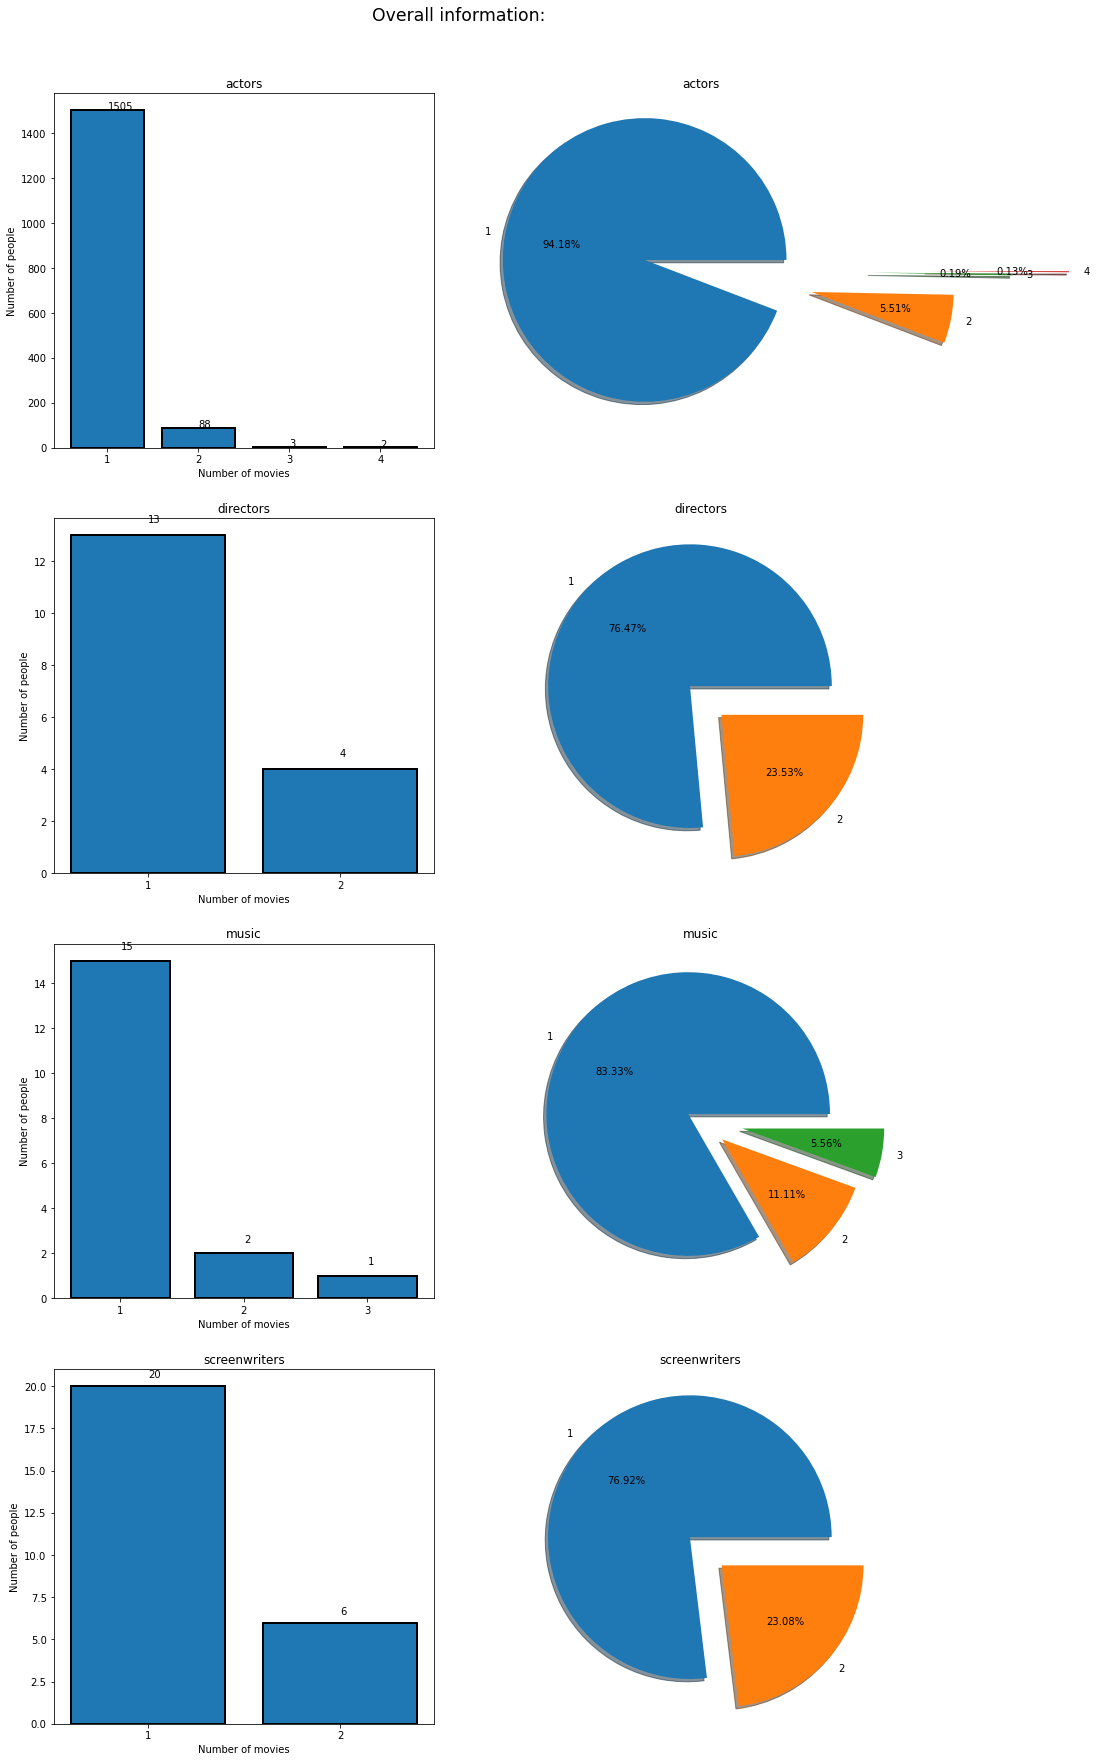

In [368]:
#wyniki ogólne
fig = plt.figure(figsize=(15,30))
plt.suptitle('Overall information:', y=0.92, size='xx-large')
subplot_rows = len(data_dict.keys())

#ustawienie nazw osi
ytitle = 'Number of people'
xtitle = 'Number of movies'

for i,key in enumerate(data_dict.keys()):
    #przygotowanie wartości
    num_of_movies = data_dict[key].Number_of_movies
    summary_num_of_movies = num_of_movies.value_counts()
    x = list(summary_num_of_movies.keys())
    y = [summary_num_of_movies[key1] for key1 in x]
    title = file_names[i]
    ##subplot
    #hist
    plt.subplot2grid((subplot_rows, 2), (i, 0), rowspan=1, colspan=1,fig=fig)
    barplot = BarPlot(x,y,xtitle,ytitle,title)
    barplot.define()
    #pie
    plt.subplot2grid((subplot_rows, 2), (i, 1), rowspan=1, colspan=1,fig=fig)
    piechart = PieChart(x,y,title)
    piechart.define()

In [379]:
'''Wnioski do szczegółowych wyników: 
I. w wykresie aktorów warto zobrazowac jedynie osoby, które wystąpiły 3 oraz 4 razy 
II. w wykesie muzyków 2 oraz 3
III. w pozostałych jedynie 2
'''

print("Jeszcze raz nazwy kluczy: {}".format(file_names))

numbers_to_show = [(3,4),(2,),(2,3),(2,)] 
print("Odpowiadajace im liczby z wniosków: {}".format(numbers_to_show))

dict_val_to_show = {}
for i, key in enumerate(file_names):
    dict_val_to_show[key] = numbers_to_show[i]
print("Słownik do kolejnych kroków: {}".format(dict_val_to_show))

Jeszcze raz nazwy kluczy: ['actors', 'directors', 'music', 'screenwriters']
Odpowiadajace im liczby z wniosków: [(3, 4), (2,), (2, 3), (2,)]
Słownik do kolejnych kroków: {'actors': (3, 4), 'directors': (2,), 'music': (2, 3), 'screenwriters': (2,)}


In [387]:
#wyniki szczegółowe

#ustawienie nazwy osi Y
ytitle = 'Number of movies'

fig = plt.figure(figsize=(15,30)) 
plt.suptitle('Specific information', y=0.92, size='xx-large')

for i,key in enumerate(data_dict.keys()):
    #wyodrebnienie jedynie wartosci zgodnych z wczesniejszymi wnioskami
    job_dict = data_dict[key].to_dict()
    job_num_dict = job_dict['Number_of_movies']
    indexes = [ky for ky in job_num_dict.keys() if job_num_dict[ky] in dict_val_to_show[key]]
    print(data_dict['actors'][666])
    
    
    '''
    people_names = data_dict[key].Name
    
    barplot = BarPlot(x,y,xtitle,ytitle,title)
    
plt.bar(a.Name[:5],a.Number_of_movies[:5],width=0.2)
plt.xticks(rotation='vertical')
plt.xlabel('Actors')
plt.ylabel('Number_of_movies')
'''

KeyError: 666

<Figure size 1080x2160 with 0 Axes>